# Análisis descriptivo de conjunto de datos

Los datos están en formato `.npy`, por lo que se necesita cargar la librería `reticulate` para cargarlos. Posteriormente se convertirán a matrices de R. Además, se necesitan varios paquetes como `raster` o `rnaturalearth` para una visualización del mapa de Canarias. 

Se carga `NumPy` de `Python` y se hace una función que convierta los `.npy` a objetos de `R`. Los datos de tierra se quieren como `dataframe`, mientras que los remapeados pueden quedarse como matrices de `R`. 

In [27]:
if (!requireNamespace("reticulate", quietly = TRUE)) install.packages("reticulate")
if (!requireNamespace("dplyr", quietly = TRUE)) install.packages("dplyr")
if (!requireNamespace("e1071", quietly = TRUE)) install.packages("e1071")
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("reshape2", quietly = TRUE)) install.packages("reshape2")
if (!requireNamespace("raster", quietly = TRUE)) install.packages("raster")
if (!requireNamespace("sf", quietly = TRUE)) install.packages("sf")
if (!requireNamespace("rnaturalearth", quietly = TRUE)) install.packages("rnaturalearth")
if (!requireNamespace("rnaturalearthdata", quietly = TRUE)) install.packages("rnaturalearthdata")
if (!requireNamespace("gridExtra", quietly = TRUE)) install.packages("gridExtra")

library(reticulate)
library(dplyr)
library(e1071) # para asimetria y curtosis
library(ggplot2) # plots lindos
library(gridExtra) # varios plots en misma figura
library(raster) # mapa de canarias
library(reshape2) # mapa de canarias
library(ggspatial) # mapa de canarias
library(rnaturalearth) # mapa de canarias
library(rnaturalearthdata) # mapa de canarias
library(sf) # mapa de canarias



numpy <- import("numpy") # numpy de python

numpy_to_r <- function(path) {
  npyArray <- numpy$load(path)
  arrayR <- py_to_r(npyArray)
  
  return(arrayR)
}

Se carga el subconjunto de datos a analizar: se tienen valores diarios (excepto datos corruptos) durante los tres periodos, y 1059 puntos de tierra. 

In [28]:
# fechas de los datos (formato YYYYMMDD)
tempTime1980_2009 <- numpy_to_r("data/tempTime_1980_2009.npy") # 1980-2009, dim(10571)
tempTime2030_2059 <- numpy_to_r("data/tempTime_2030_2059.npy") # 2030-2059, dim(10814)
tempTime2070_2099 <- numpy_to_r("data/tempTime_2070_2099.npy") # 2070-2099, dim(10886)

precipTime1980_2009 <- numpy_to_r("data/precipTime_1980_2009.npy") # 1980-2009, dim(10231)
precipTime2030_2059 <- numpy_to_r("data/precipTime_2030_2059.npy") # 2030-2059, dim(9445)
precipTime2070_2099 <- numpy_to_r("data/precipTime_2070_2099.npy") # 2070-2099, dim(10895)


# datos de temperatura y precipitación en tierra
tempGFDL1 <- numpy_to_r("data/tempGFDL1_predictions.npy") - 273.15 # 1980-2009, dim(10571, 1059)
tempGFDL2 <- numpy_to_r("data/tempGFDL2_predictions.npy") - 273.15 # 2030-2059, dim(10814, 1059)
tempGFDL3 <- numpy_to_r("data/tempGFDL3_predictions.npy") - 273.15 # 2070-2099, dim(10886, 1059)
precipIPSL1 <- numpy_to_r("data/precipIPSL1_predictions.npy") # 1980-2009, dim(10231, 1059)
precipIPSL2 <- numpy_to_r("data/precipIPSL2_predictions.npy") # 2030-2059, dim(9445, 1059)
precipIPSL3 <- numpy_to_r("data/precipIPSL3_predictions.npy") # 2070-2099, dim(10895, 1059)


# datos remapeados
tempGFDL1_map <- numpy_to_r("data/tempGFDL1_predictions_map.npy") - 273.15 # 1980-2009, dim(10571, 68, 158)
tempGFDL2_map <- numpy_to_r("data/tempGFDL2_predictions_map.npy") - 273.15 # 2030-2059, dim(10814, 68, 158)
tempGFDL3_map <- numpy_to_r("data/tempGFDL3_predictions_map.npy") - 273.15 # 2070-2099, dim(10886, 68, 158)

precipIPSL1_map <- numpy_to_r("data/precipIPSL1_predictions_map.npy") # 1980-2009, dim(10231, 68, 158)
precipIPSL2_map <- numpy_to_r("data/precipIPSL2_predictions_map.npy") # 2030-2059, dim(9445, 68, 158)
precipIPSL3_map <- numpy_to_r("data/precipIPSL3_predictions_map.npy") # 2070-2099, dim(10895, 68, 158)

# Resumen numérico

Si se visualiza esto ahora mismo, no se puede sacar ningún tipo de conclusión debido a la extensión de los datos; no son más que un conjunto de números. Cabe destacar que en un pasado reciente y actualmente, la precipitación media en Canarias es menor a 1 mm/día, con grandes periodos de sequia en numerosas zonas de las islas (a pesar de existir zonas con una mayor precipitacion anual); esto da como resultado muchos valores completamente nulos en la tabla `precip_data`.

In [29]:
precipIPSL1

0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.5715466,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
2.1269469,1.085769,0,2.737702,1.469806,0.7465973,0.5298271,0.6654009,1.268125,2.458555,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0
0.0000000,0.000000,0,0.000000,0.000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0.0000000,0,0


Para resumir numéricamente los datos, se usarán distintas medidas de posición y dispersión adecuadas a los datos, así como de forma en el caso de hacer la media temporal de los datos primero. En este caso, se calculará la media y la mediana, que deberían mostrar valores próximos. Como medidas de dispersión se tomarán la varianza y la desviación estándar. La varianza finalmente no se usará para el informe.

In [30]:
stats <- function(data, d, skew=NULL) {
    if (d == "temporal") {
        dimen <- 2  # columnas
    }
    else if (d == "espacial") {
        dimen <- 1  # filas
    }
    else {
        stop("La dimensión debe ser 'temporal' o 'espacial'")
    }

    # asimetria
    if (!is.null(skew)) {
        asimetria <- apply(data, dimen, skewness, na.rm = TRUE)
        
        df_total <- data.frame(
            Interval = c("(-Inf, -1)", "[-1, -0.5)", "[-0.5, 0)", "0.0", "(0, 0.5]", "(0.5, 1]", "(1, Inf)"),
            Count = c(
                sum(asimetria < -1, na.rm = TRUE),
                sum(asimetria >= -1 & asimetria < -0.5, na.rm = TRUE),
                sum(asimetria >= -0.5 & asimetria < 0, na.rm = TRUE),
                sum(asimetria == 0.0, na.rm = TRUE),
                sum(asimetria > 0 & asimetria <= 0.5, na.rm = TRUE),
                sum(asimetria > 0.5 & asimetria <= 1, na.rm = TRUE),
                sum(asimetria > 1, na.rm = TRUE)
            )
        )
        return(t(df_total))
    }

    # posicion y dispersion
    else{
        media <- apply(data, dimen, mean, na.rm = TRUE)
        mediana <- apply(data, dimen, median, na.rm = TRUE)

        varianza <- apply(data, dimen, var, na.rm = TRUE)
        desviacion_estandar <- apply(data, dimen, sd, na.rm = TRUE)

        return(list(media = media, mediana = mediana, varianza = varianza, desviacion_estandar = desviacion_estandar))
    }
}


## Asimetría 
Se verá primero la asimetría de las distribuciones de temperatura media, que teóricamente se suele asociar (de forma parcialmente incorrecta) a una distribución gaussiana. Aquí no se estudiará las distribuciones de precipitacion acumulada, ya que la forma de obtener las predicciones fue minimizando una distribución Bernouilli-Gamma por lo que, "por construcción", no se espera ningún tipo de simetría o similitud con una normal o gaussiana. 

### Distribución espacial
Primero, se estudia la asimetría de la distribución espacial, lo que deja con 10571 datos. Para mayor claridad, se muestra una estadística de los rangos de valores en los que se encuentran los valores de asimetría obtenidos.

In [31]:
skew_tempGFDL1_esp <- stats(tempGFDL1, "espacial", skew=TRUE)
skew_tempGFDL2_esp <- stats(tempGFDL2, "espacial", skew=TRUE)
skew_tempGFDL3_esp <- stats(tempGFDL3, "espacial", skew=TRUE)

print("1980-2009:")
skew_tempGFDL1_esp
print("2030-2059:")
skew_tempGFDL2_esp
print("2070-2099:")
skew_tempGFDL3_esp

[1] "1980-2009:"


Interval,"(-Inf, -1)","[-1, -0.5)","[-0.5, 0)",0.0,"(0, 0.5]","(0.5, 1]","(1, Inf)"
Count,6511,2460,828,0,667,105,0


[1] "2030-2059:"


Interval,"(-Inf, -1)","[-1, -0.5)","[-0.5, 0)",0.0,"(0, 0.5]","(0.5, 1]","(1, Inf)"
Count,6595,2223,969,0,782,245,0


[1] "2070-2099:"


Interval,"(-Inf, -1)","[-1, -0.5)","[-0.5, 0)",0.0,"(0, 0.5]","(0.5, 1]","(1, Inf)"
Count,5764,2155,1183,0,1326,458,0


Se puede apreciar una desviación del grueso de los datos hacia la derecha, siendo en general una distribucion altamente asimétrica. 

### Distribución temporal

Ahora se comprueba la simetría de la distribución temporal, lo que deja con 1059 valores.

In [32]:
skew_tempGFDL1_temp <- stats(tempGFDL1, "temporal", skew=TRUE)
skew_tempGFDL2_temp <- stats(tempGFDL2, "temporal", skew=TRUE)
skew_tempGFDL3_temp <- stats(tempGFDL3, "temporal", skew=TRUE)

print("1980-2009:")
skew_tempGFDL1_temp
print("2030-2059:")
skew_tempGFDL2_temp
print("2070-2099:")
skew_tempGFDL3_temp

[1] "1980-2009:"


Interval,"(-Inf, -1)","[-1, -0.5)","[-0.5, 0)",0.0,"(0, 0.5]","(0.5, 1]","(1, Inf)"
Count,0,0,0,0,599,460,0


[1] "2030-2059:"


Interval,"(-Inf, -1)","[-1, -0.5)","[-0.5, 0)",0.0,"(0, 0.5]","(0.5, 1]","(1, Inf)"
Count,0,0,0,0,648,411,0


[1] "2070-2099:"


Interval,"(-Inf, -1)","[-1, -0.5)","[-0.5, 0)",0.0,"(0, 0.5]","(0.5, 1]","(1, Inf)"
Count,0,0,0,0,708,351,0


En este caso, hay una ligera tendencia a valores bajos, pero en general mantienen una cierta simetría. 

## Medidas de posición y dispersión

Ahora se mostrarán las medidas de posición y dispersión, tanto espacial como temporalmente. Se agruparán los valores en tres tablas, una para cada periodo. Cada tabla contendrá las medidas mencionadas para ambas variables de estudio, temperatura media (T) y precipitación acumulada (P).

In [33]:
make_time_table <- function(arr1, arr2, tiempos1=NULL, tiempos2=NULL) {
  df1 <- data.frame(
    Media_t = arr1$media,
    Mediana_t = arr1$mediana,
    Varianza_t = arr1$varianza,
    std1_t = arr1$desviacion_estandar
  )
  
  df2 <- data.frame(
    Media_p = arr2$media,
    Mediana_p = arr2$mediana,
    Varianza_p = arr2$varianza,
    std1_p = arr2$desviacion_estandar
  )

  if (!is.null(tiempos1) && !is.null(tiempos2)) {
    rownames(df1) <- tiempos1
    rownames(df2) <- tiempos2
    merged_df <- merge(df1, df2, by = "row.names", all = TRUE)
    colnames(merged_df) <- c("Date", "Media (T)", "Mediana (T)", "Varianza (T)", "Desv estandar (T)", "Media (P)", "Mediana (P)", "Varianza (P)", "Desv estandar (P)")
  }
  else{
    merged_df <- merge(df1, df2, by = "row.names", all = TRUE)
    colnames(merged_df) <- c("Point", "Media (T)", "Mediana (T)", "Varianza (T)", "Desv estandar (T)", "Media (P)", "Mediana (P)", "Varianza (P)", "Desv estandar (P)")
  }
  
  
  return(merged_df)
}

### Promedio espacial 

Se empieza con la parte espacial:

In [34]:
stats_tempGFDL1_esp <- stats(tempGFDL1, "espacial")
stats_tempGFDL2_esp <- stats(tempGFDL2, "espacial")
stats_tempGFDL3_esp <- stats(tempGFDL3, "espacial")
stats_precipIPSL1_esp <- stats(precipIPSL1, "espacial")
stats_precipIPSL2_esp <- stats(precipIPSL2, "espacial")
stats_precipIPSL3_esp <- stats(precipIPSL3, "espacial")

df1980_2009 <- make_time_table(stats_tempGFDL1_esp, stats_precipIPSL1_esp, tempTime1980_2009, precipTime1980_2009)
df2030_2059 <- make_time_table(stats_tempGFDL2_esp, stats_precipIPSL2_esp, tempTime2030_2059, precipTime2030_2059)
df2070_2099 <- make_time_table(stats_tempGFDL3_esp, stats_precipIPSL3_esp, tempTime2070_2099, precipTime2070_2099)

df1980_2009
df2030_2059
df2070_2099

Date,Media (T),Mediana (T),Varianza (T),Desv estandar (T),Media (P),Mediana (P),Varianza (P),Desv estandar (P)
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19800101,12.236049,12.95517,9.686939,3.112385,0.0004439367,0,0.0002087075,0.01444671
19800102,12.003676,12.73318,9.900204,3.146459,0.0010996996,0,0.0006570471,0.02563293
19800103,12.578016,13.24328,9.672922,3.110132,0.0000000000,0,0.0000000000,0.00000000
19800104,13.123826,13.68989,9.364268,3.060109,0.0000000000,0,0.0000000000,0.00000000
19800105,13.488512,14.01080,8.246618,2.871693,0.0000000000,0,0.0000000000,0.00000000
19800106,14.374790,14.91782,7.429818,2.725769,0.0121820662,0,0.0154097093,0.12413585
19800107,14.443408,15.03841,7.207084,2.684601,0.2243567781,0,0.5016313994,0.70825942
19800108,13.411209,14.16814,8.406502,2.899397,0.0336092126,0,0.0542390631,0.23289281
19800109,13.195738,13.93397,7.839880,2.799979,0.9017075887,0,4.5765750559,2.13929312


Date,Media (T),Mediana (T),Varianza (T),Desv estandar (T),Media (P),Mediana (P),Varianza (P),Desv estandar (P)
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20300101,13.81852,14.47387,9.284369,3.047026,0.0000000000,0.0000000,0.000000e+00,0.00000000
20300102,13.06495,13.69070,10.928420,3.305816,0.0000000000,0.0000000,0.000000e+00,0.00000000
20300103,13.26254,13.83925,10.308662,3.210711,0.0000000000,0.0000000,0.000000e+00,0.00000000
20300104,13.99420,14.50507,9.206187,3.034170,0.0000000000,0.0000000,0.000000e+00,0.00000000
20300105,14.88479,15.34840,7.316040,2.704818,0.0000000000,0.0000000,0.000000e+00,0.00000000
20300106,15.83597,16.19824,5.939236,2.437055,0.0000000000,0.0000000,0.000000e+00,0.00000000
20300107,16.07158,16.49247,6.302455,2.510469,0.0000000000,0.0000000,0.000000e+00,0.00000000
20300108,15.73169,16.27567,6.655412,2.579809,0.0010785318,0.0000000,4.116037e-04,0.02028802
20300109,15.48521,16.04203,6.614690,2.571904,0.0018769673,0.0000000,7.657083e-04,0.02767144


Date,Media (T),Mediana (T),Varianza (T),Desv estandar (T),Media (P),Mediana (P),Varianza (P),Desv estandar (P)
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20700101,13.12187,14.01740,11.462981,3.385702,0.000000000,0,0.0000000000,0.00000000
20700102,13.51636,14.39183,9.913870,3.148630,0.001089548,0,0.0006304723,0.02510921
20700103,13.71676,14.61399,9.482778,3.079412,0.000000000,0,0.0000000000,0.00000000
20700104,13.27590,14.06754,9.114651,3.019048,0.001468413,0,0.0011783319,0.03432684
20700105,14.27905,15.09340,9.205683,3.034087,0.003345297,0,0.0022958964,0.04791551
20700106,15.29916,16.09365,6.675055,2.583613,0.002342575,0,0.0015482301,0.03934755
20700107,15.99887,16.66100,5.330597,2.308809,0.002785865,0,0.0021350558,0.04620666
20700108,14.67673,15.64506,7.692820,2.773593,0.008720421,0,0.0094422930,0.09717146
20700109,13.40170,14.05663,7.990617,2.826768,0.008339112,0,0.0104331386,0.10214274


Se tiene un valor diario, lo que deja con 10571 valores. Si bien reduce el conjunto original, sigue siendo una cantidad de la que es dificil sacar conclusiones. Se pueden reducir más haciendo ahora la media temporal, obteniendo así valores representativos de cada serie temporal:

In [35]:
medias_esp_temp_1980_2009 <- data.frame(t(colMeans(df1980_2009[, -1], na.rm = TRUE)))
medias_esp_temp_2030_2059 <- data.frame(t(colMeans(df2030_2059[, -1], na.rm = TRUE)))
medias_esp_temp_2070_2099 <- data.frame(t(colMeans(df2070_2099[, -1], na.rm = TRUE)))

print("1980-2009:")
medias_esp_temp_1980_2009
print("2030-2059:")
medias_esp_temp_2030_2059
print("2070-2099:")
medias_esp_temp_2070_2099

[1] "1980-2009:"


Media..T.,Mediana..T.,Varianza..T.,Desv.estandar..T.,Media..P.,Mediana..P.,Varianza..P.,Desv.estandar..P.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.02243,16.48387,7.170275,2.631326,0.2321501,0.1099124,1.144633,0.4290337


[1] "2030-2059:"


Media..T.,Mediana..T.,Varianza..T.,Desv.estandar..T.,Media..P.,Mediana..P.,Varianza..P.,Desv.estandar..P.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.53694,17.91195,6.583745,2.530044,0.1709734,0.06388327,0.8431078,0.3943251


[1] "2070-2099:"


Media..T.,Mediana..T.,Varianza..T.,Desv.estandar..T.,Media..P.,Mediana..P.,Varianza..P.,Desv.estandar..P.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.0099,19.28329,6.241565,2.470142,0.1414312,0.03294988,0.5204665,0.4051486


### Promedio temporal

Se procede del mismo modo que antes, esta vez se tendrá un número más reducido de valores:

In [36]:
stats_tempGFDL1_temporal <- stats(tempGFDL1, "temporal")
stats_tempGFDL2_temporal <- stats(tempGFDL2, "temporal")
stats_tempGFDL3_temporal <- stats(tempGFDL3, "temporal")
stats_precipIPSL1_temporal <- stats(precipIPSL1, "temporal")
stats_precipIPSL2_temporal <- stats(precipIPSL2, "temporal")
stats_precipIPSL3_temporal <- stats(precipIPSL3, "temporal")

df1980_2009_temporal <- make_time_table(stats_tempGFDL1_temporal, stats_precipIPSL1_temporal)
df2030_2059_temporal <- make_time_table(stats_tempGFDL2_temporal, stats_precipIPSL2_temporal)
df2070_2099_temporal <- make_time_table(stats_tempGFDL3_temporal, stats_precipIPSL3_temporal)

df1980_2009_temporal
df2030_2059_temporal
df2070_2099_temporal

Point,Media (T),Mediana (T),Varianza (T),Desv estandar (T),Media (P),Mediana (P),Varianza (P),Desv estandar (P)
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20.18850,19.58357,9.876108,3.142627,0.05899827,0,0.2032281,0.4508083
10,19.19305,18.56223,13.510497,3.675663,0.13644006,0,0.7611001,0.8724105
100,18.60664,18.09029,7.198911,2.683079,0.08724330,0,0.6867425,0.8286993
1000,17.02794,16.32030,10.198137,3.193452,0.09860028,0,0.5772274,0.7597548
1001,17.45155,17.01212,5.158468,2.271226,0.10439861,0,0.6922315,0.8320045
1002,17.31642,16.99661,3.769737,1.941581,0.47232583,0,0.5444102,0.7378416
1003,16.70395,16.29077,5.264468,2.294443,0.46820648,0,0.5723713,0.7565522
1004,16.08986,15.63364,6.200495,2.490079,0.37984379,0,0.6105053,0.7813484
1005,15.61550,15.14396,6.867937,2.620675,0.24051871,0,0.4858718,0.6970451


Point,Media (T),Mediana (T),Varianza (T),Desv estandar (T),Media (P),Mediana (P),Varianza (P),Desv estandar (P)
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21.63614,20.94438,10.746534,3.278191,0.03556124,0.0000000,0.1119095,0.3345287
10,20.74862,20.03803,14.072162,3.751288,0.08101723,0.0000000,0.4583297,0.6770005
100,19.91079,19.27001,8.323778,2.885096,0.04383000,0.0000000,0.2634802,0.5133032
1000,18.41901,17.55968,11.692870,3.419484,0.05357840,0.0000000,0.3071638,0.5542236
1001,18.65831,18.09818,6.395825,2.528997,0.05761672,0.0000000,0.3849624,0.6204534
1002,18.37778,17.91439,4.770205,2.184080,0.56517915,0.0000000,0.5797942,0.7614422
1003,17.83645,17.30352,6.339709,2.517878,0.58005431,0.0000000,0.6708347,0.8190450
1004,17.31731,16.74211,7.384642,2.717470,0.45817952,0.0000000,0.6508869,0.8067756
1005,16.86978,16.26474,8.148667,2.854587,0.28297042,0.0000000,0.4998257,0.7069836


Point,Media (T),Mediana (T),Varianza (T),Desv estandar (T),Media (P),Mediana (P),Varianza (P),Desv estandar (P)
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23.10947,22.40811,12.040834,3.469991,0.01943750,0.0000000,0.06515742,0.2552595
10,22.32453,21.62033,15.523030,3.939928,0.04472393,0.0000000,0.20655611,0.4544844
100,21.18303,20.48395,9.400053,3.065951,0.02215708,0.0000000,0.10563698,0.3250184
1000,19.77042,18.87335,13.003326,3.606013,0.02548170,0.0000000,0.11021034,0.3319794
1001,19.80774,19.19027,7.268327,2.695984,0.02364208,0.0000000,0.10040017,0.3168599
1002,19.37959,18.83664,5.444299,2.333302,0.67202675,0.3374078,0.54647628,0.7392403
1003,18.88415,18.26704,7.154893,2.674863,0.73155662,0.3223097,0.73769496,0.8588917
1004,18.47044,17.83076,8.249683,2.872226,0.57805001,0.0000000,0.60058374,0.7749734
1005,18.03570,17.35401,9.053983,3.008984,0.36429855,0.0000000,0.38149819,0.6176554


Un valor para cada gridpoint de tierra sobre el mapa de Canarias. Sigue siendo un número elevado de datos, por lo que se continuará haciendo la media espacial para obtener valores representativos de todo el espacio:

In [37]:
medias_temp_esp_1980_2009 <- data.frame(t(colMeans(df1980_2009_temporal[, -1], na.rm = TRUE)))
medias_temp_esp_2030_2059 <- data.frame(t(colMeans(df2030_2059_temporal[, -1], na.rm = TRUE)))
medias_temp_esp_2070_2099 <- data.frame(t(colMeans(df2070_2099_temporal[, -1], na.rm = TRUE)))

print("1980-2009:")
medias_temp_esp_1980_2009
print("2030-2059:")
medias_temp_esp_2030_2059
print("2070-2099:")
medias_temp_esp_2070_2099

[1] "1980-2009:"


Media..T.,Mediana..T.,Varianza..T.,Desv.estandar..T.,Media..P.,Mediana..P.,Varianza..P.,Desv.estandar..P.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.02243,15.36456,14.26306,3.617428,0.2321501,0.002658438,2.249286,1.258847


[1] "2030-2059:"


Media..T.,Mediana..T.,Varianza..T.,Desv.estandar..T.,Media..P.,Mediana..P.,Varianza..P.,Desv.estandar..P.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
17.53694,16.78907,15.44016,3.791262,0.1709734,0.007048159,1.515941,1.018388


[1] "2070-2099:"


Media..T.,Mediana..T.,Varianza..T.,Desv.estandar..T.,Media..P.,Mediana..P.,Varianza..P.,Desv.estandar..P.
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
19.0099,18.19389,17.03234,3.987731,0.1414312,0.01919235,0.7113172,0.6866815


Es importante recalcar que estas operaciones no son conmutativas, por lo que estas variables no tienen porqué coincidir con las resultantes de hacer primero la media espacial y luego temporal. 

# Resumen gráfico

Dependiendo si se trata con las distribuciones espaciales o temporales, se pueden visualizar de formas distintas. 

## Distribución temporal

En este caso se tiene una gran cantidad de datos a lo largo de un periodo extenso de años, lo que permite visualizar tanto series temporales como estacionales en cada año. Se tomará como año de referencia 2030, para mostrar la estacionalidad mediante un gráfico de líneas, y se visualizarán las tres series temporales de 30 años disponibles mediante un boxplot. 

In [38]:
# media espacial de temperatura y precipitación
media_esp_tempGFDL1 <- rowMeans(tempGFDL1, na.rm = TRUE)
media_esp_tempGFDL2 <- rowMeans(tempGFDL2, na.rm = TRUE)
media_esp_tempGFDL3 <- rowMeans(tempGFDL3, na.rm = TRUE)

media_esp_precipIPSL1 <- rowMeans(precipIPSL1, na.rm = TRUE)
media_esp_precipIPSL2 <- rowMeans(precipIPSL2, na.rm = TRUE)
media_esp_precipIPSL3 <- rowMeans(precipIPSL3, na.rm = TRUE)

# sacamos subarrays para cada año
subarrs_anhos <- function(fechas, valores) {
    anhos <- unique(substr(fechas, 1, 4))
    resultado <- list()
    
  for (anho in anhos) {
    indices <- grep(paste0("^", anho), fechas) # buscar fechas que empiecen por el año 
    resultado[[anho]] <- list(
      fechas = fechas[indices],
      valores = valores[indices]
    )
  }
  
  return(resultado)
}

# Extraer subarrays por año para cada conjunto de datos
subarrays_tempGFDL1 <- subarrs_anhos(tempTime1980_2009, media_esp_tempGFDL1)
subarrays_tempGFDL2 <- subarrs_anhos(tempTime2030_2059, media_esp_tempGFDL2)
subarrays_tempGFDL3 <- subarrs_anhos(tempTime2070_2099, media_esp_tempGFDL3)

subarrays_precipIPSL1 <- subarrs_anhos(precipTime1980_2009, media_esp_precipIPSL1)
subarrays_precipIPSL2 <- subarrs_anhos(precipTime2030_2059, media_esp_precipIPSL2)
subarrays_precipIPSL3 <- subarrs_anhos(precipTime2070_2099, media_esp_precipIPSL3)

Se transforman y preparan los datos de los subarrays de forma adecuada para el tipo de gráficos y etiquetado que se mostrará más adelante.

In [39]:
trans <- function(subarr) {
  data <- data.frame()
  for (anho in names(subarr)) {
    temp_data <- data.frame(
      fechas = subarr[[anho]]$fechas,
      valores = subarr[[anho]]$valores,
      anho = anho
    )
    data <- rbind(data, temp_data)
  }
  return(data)
}

data_tempGFDL1 <- trans(subarrays_tempGFDL1)
data_tempGFDL2 <- trans(subarrays_tempGFDL2)
data_tempGFDL3 <- trans(subarrays_tempGFDL3)

data_precipIPSL1 <- trans(subarrays_precipIPSL1)
data_precipIPSL2 <- trans(subarrays_precipIPSL2)
data_precipIPSL3 <- trans(subarrays_precipIPSL3)

### Temperatura media

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

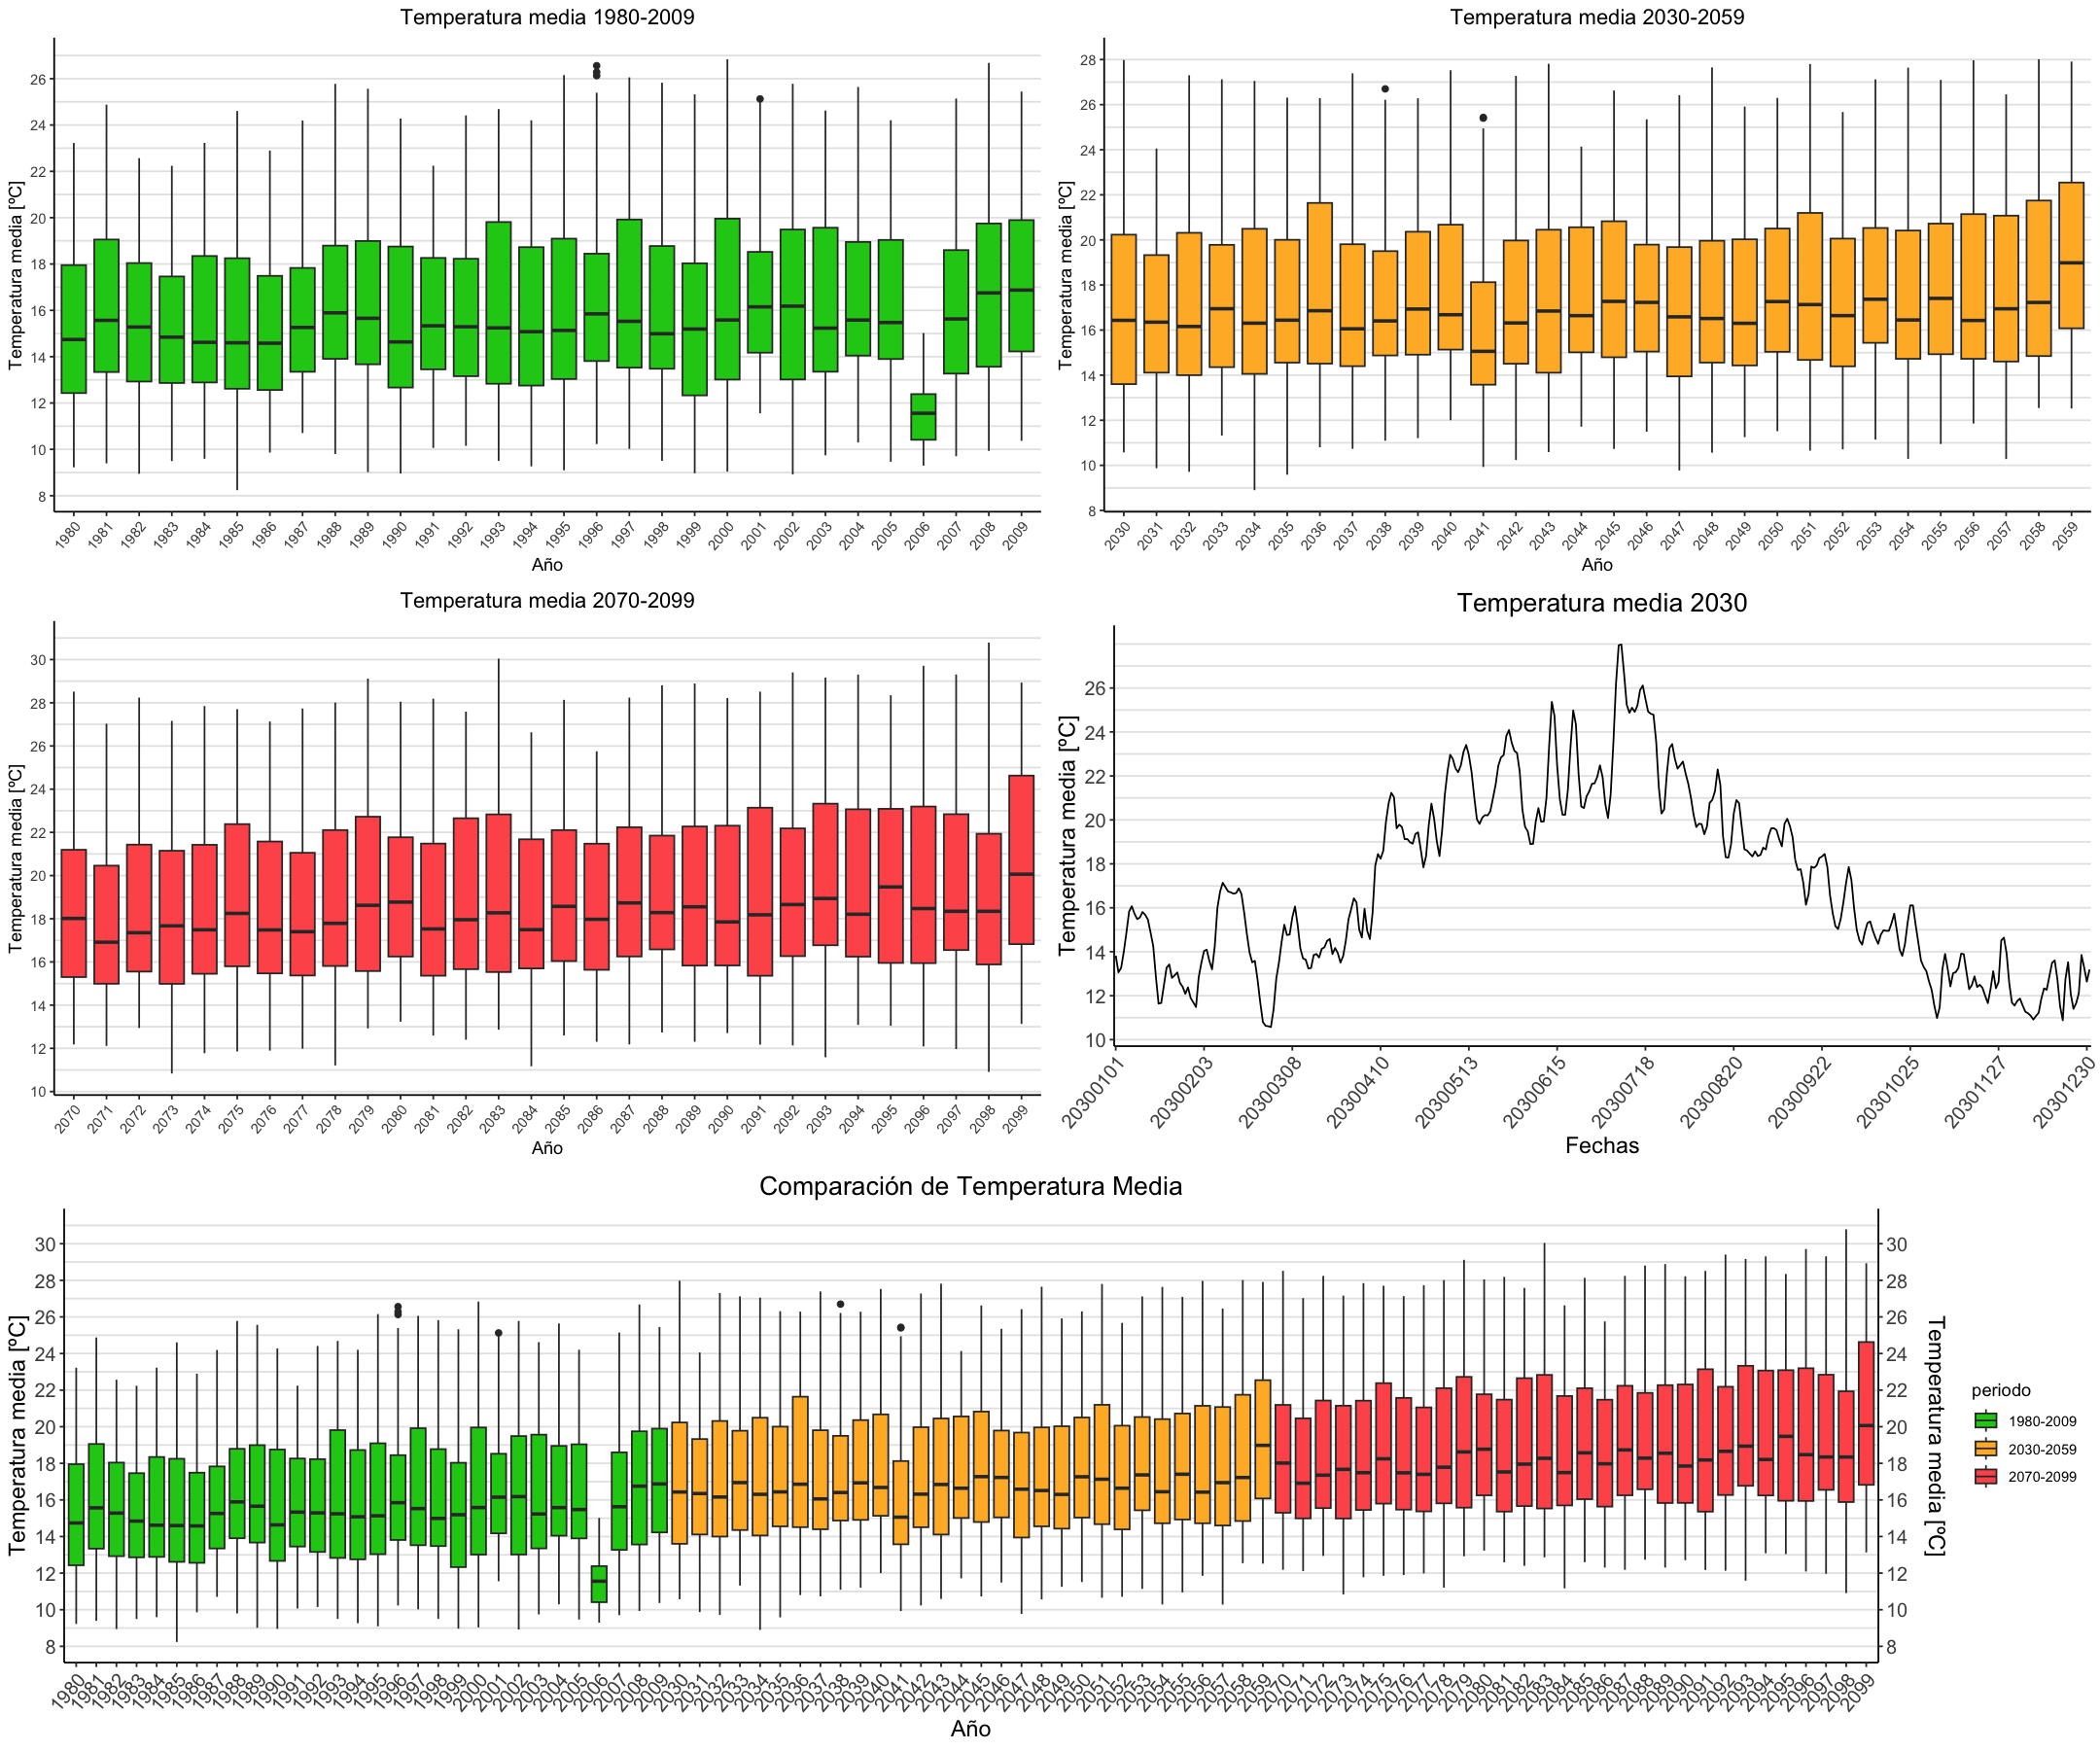

In [40]:
# Establecer la configuración regional a UTF-8 para que salga la ñ
Sys.setlocale("LC_ALL", "es_ES.UTF-8")
options(repr.plot.width = 18, repr.plot.height = 15)

# plot 1980-2009
plot1 <- ggplot(data_tempGFDL1, aes(x = anho, y = valores)) +
  geom_boxplot(fill = "#17cb17") +
  labs(title = "Temperatura media 1980-2009", x = "Año", y = "Temperatura media [ºC]") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 50, hjust = 1),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_y_continuous(breaks = seq(0, max(data_tempGFDL1$valores, na.rm = TRUE), by = 2))

# plot 2030-2059
plot2 <- ggplot(data_tempGFDL2, aes(x = anho, y = valores)) +
  geom_boxplot(fill = "#ffb731") +
  labs(title = "Temperatura media 2030-2059", x = "Año", y = "Temperatura media [ºC]") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 50, hjust = 1),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_y_continuous(breaks = seq(0, max(data_tempGFDL2$valores, na.rm = TRUE), by = 2))

# plot 2070-2099
plot3 <- ggplot(data_tempGFDL3, aes(x = anho, y = valores)) +
  geom_boxplot(fill = "#ff5959") +
  labs(title = "Temperatura media 2070-2099", x = "Año", y = "Temperatura media [ºC]") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 50, hjust = 1),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_y_continuous(breaks = seq(0, max(data_tempGFDL3$valores, na.rm = TRUE), by = 2))


# plot 2030
data_tempGFDL2_2030 <- data_tempGFDL2[data_tempGFDL2$anho == "2030", ] # todas las columnas de 2030

plot4 <- ggplot(data_tempGFDL2_2030, aes(x = fechas, y = valores, group = 1)) +
  geom_line() +
  labs(title = "Temperatura media 2030", x = "Fechas", y = "Temperatura media [ºC]") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(angle = 50, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_x_discrete(breaks = data_tempGFDL2_2030$fechas[seq(1, length(data_tempGFDL2_2030$fechas), by = 33)]) +
  scale_y_continuous(breaks = seq(0, max(data_tempGFDL2_2030$valores, na.rm = TRUE), by = 2))


# plot combinado
data_tempGFDL1$periodo <- "1980-2009"
data_tempGFDL2$periodo <- "2030-2059"
data_tempGFDL3$periodo <- "2070-2099"
data_combined <- rbind(data_tempGFDL1, data_tempGFDL2, data_tempGFDL3)

plot5 <- ggplot(data_combined, aes(x = anho, y = valores, fill = periodo)) +
  geom_boxplot() +
  scale_fill_manual(values = c("1980-2009" = "#17cb17", "2030-2059" = "#ffb731", "2070-2099" = "#ff5959")) +
  labs(title = "Comparación de Temperatura Media", x = "Año", y = "Temperatura media [ºC]") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(angle = 50, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.title.y.right = element_text(margin = margin(l = 10))
  ) +
  scale_y_continuous(
    breaks = seq(0, max(c(data_tempGFDL1$valores, data_tempGFDL2$valores, data_tempGFDL3$valores), na.rm = TRUE), by = 2),
    sec.axis = dup_axis(name = "Temperatura media [ºC]")
  )
# cuadrícula
grid.arrange(plot1, plot2, plot3, plot4, plot5, layout_matrix = rbind(c(1, 2), c(3, 4), c(5, 5)))
ggsave("fotos/plot4.pdf", plot = plot4, device = "pdf", width = 9, height = 5)
ggsave("fotos/plot5.pdf", plot = plot5, device = "pdf", width = 20, height = 8)

### Precipitación acumulada

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

Warning message:
“Removed 954 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 617 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 574 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2154 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2154 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


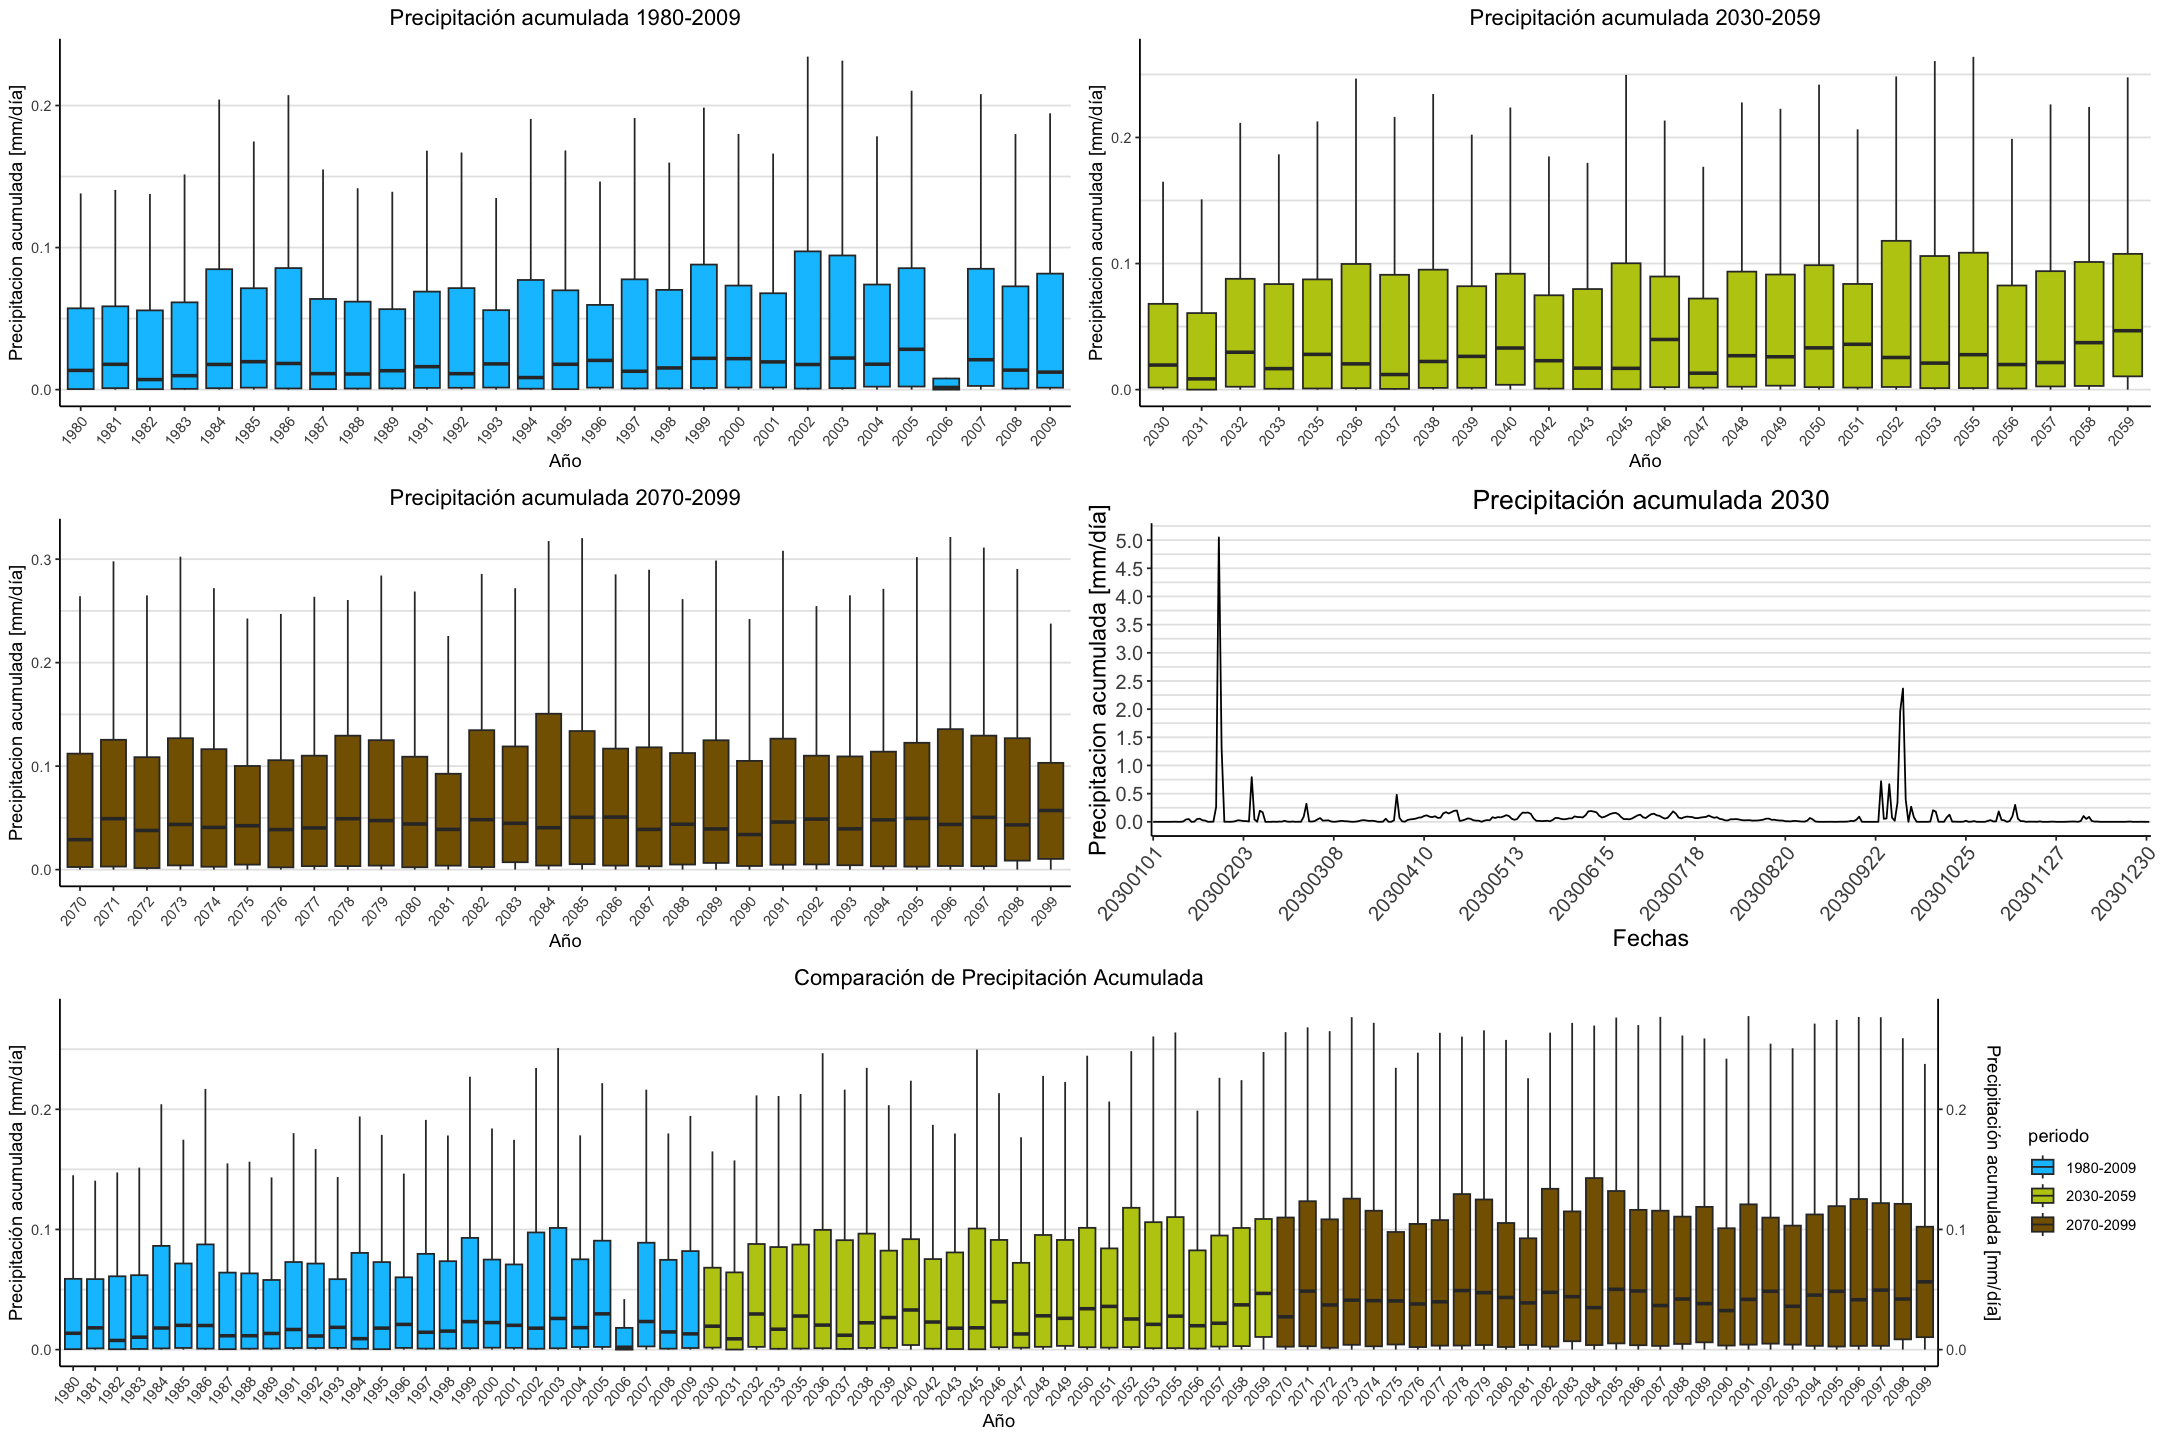

In [41]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8")
options(repr.plot.width = 18, repr.plot.height = 12)



# calcular los límites del eje y excluyendo outliers
calcular_limites_y <- function(data) {
  quantiles <- quantile(data$valores, probs = c(0.25, 0.75), na.rm = TRUE)
  IQR <- quantiles[2] - quantiles[1]
  lower_limit <- quantiles[1] - 1.5 * IQR
  upper_limit <- quantiles[2] + 1.5 * IQR
  return(c(lower_limit, upper_limit))
}

# límites del eje y para cada conjunto
limites_y_precipIPSL1 <- calcular_limites_y(data_precipIPSL1)
limites_y_precipIPSL2 <- calcular_limites_y(data_precipIPSL2)
limites_y_precipIPSL3 <- calcular_limites_y(data_precipIPSL3)

# plot 1980-2009
plot6 <- ggplot(data_precipIPSL1, aes(x = anho, y = valores)) +
  geom_boxplot(fill = "#00c3ff", outlier.shape = NA) +
  labs(title = "Precipitación acumulada 1980-2009", x = "Año", y = "Precipitacion acumulada [mm/día]") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 50, hjust = 1),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_y_continuous(limits = c(0, limites_y_precipIPSL1[2]), breaks = seq(0, ceiling(limites_y_precipIPSL1[2]), by = 0.1))

# plot 2030-2059
plot7 <- ggplot(data_precipIPSL2, aes(x = anho, y = valores)) +
  geom_boxplot(fill = "#bbca12", outlier.shape = NA) +
  labs(title = "Precipitación acumulada 2030-2059", x = "Año", y = "Precipitacion acumulada [mm/día]") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 50, hjust = 1),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_y_continuous(limits = c(0, limites_y_precipIPSL2[2]), breaks = seq(0, ceiling(limites_y_precipIPSL2[2]), by = 0.1))

# plot 2070-2099
plot8 <- ggplot(data_precipIPSL3, aes(x = anho, y = valores)) +
  geom_boxplot(fill = "#846000", outlier.shape = NA) +
  labs(title = "Precipitación acumulada 2070-2099", x = "Año", y = "Precipitacion acumulada [mm/día]") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 50, hjust = 1),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_y_continuous(limits = c(0, limites_y_precipIPSL3[2]), breaks = seq(0, ceiling(limites_y_precipIPSL3[2]), by = 0.1))

#plot 2030
data_precipIPSL2_2030 <- data_precipIPSL2[data_precipIPSL2$anho == "2030", ]

plot9 <- ggplot(data_precipIPSL2_2030, aes(x = fechas, y = valores, group = 1)) +
  geom_line() +
  labs(title = "Precipitación acumulada 2030", x = "Fechas", y = "Precipitacion acumulada [mm/día]") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    axis.text.x = element_text(angle = 50, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black")
  ) +
  scale_x_discrete(breaks = data_precipIPSL2_2030$fechas[seq(1, length(data_precipIPSL2_2030$fechas), by = 33)]) +
  scale_y_continuous(breaks = seq(0, max(data_precipIPSL2_2030$valores, na.rm = TRUE), by = 0.5))



# plot combinado
data_precipIPSL1$periodo <- "1980-2009"
data_precipIPSL2$periodo <- "2030-2059"
data_precipIPSL3$periodo <- "2070-2099"
data_combined_precip <- rbind(data_precipIPSL1, data_precipIPSL2, data_precipIPSL3)
limites_y_data_combined_precip <- calcular_limites_y(data_combined_precip)

plot10 <- ggplot(data_combined_precip, aes(x = anho, y = valores, fill = periodo)) +
  geom_boxplot(outlier.shape = NA) +
  scale_fill_manual(values = c("1980-2009" = "#00c3ff", "2030-2059" = "#bbca12", "2070-2099" = "#846000")) +
  labs(title = "Comparación de Precipitación Acumulada", x = "Año", y = "Precipitación acumulada [mm/día]") +
  theme(
    plot.title = element_text(hjust = 0.5),
    axis.text.x = element_text(angle = 50, hjust = 1),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black"),
    axis.title.y.right = element_text(margin = margin(l = 10))
  ) +
  scale_y_continuous(
    limits = c(0, limites_y_data_combined_precip[2]),
    breaks = seq(0, ceiling(limites_y_data_combined_precip[2]), by = 0.1),
    sec.axis = dup_axis(name = "Precipitación acumulada [mm/día]")
  )

# cuadricula
grid.arrange(plot6, plot7, plot8, plot9, plot10, layout_matrix = rbind(c(1, 2), c(3, 4), c(5, 5)))
ggsave("fotos/plot9.pdf", plot = plot9, device = "pdf", width = 9, height = 5)
ggsave("fotos/plot10.pdf", plot = plot10, device = "pdf", width = 20, height = 8)

En este caso, se eliminan outliers para visualizar el "box" correctamente

## Distribución espacial

En este caso se tendrá la media temporal de cada punto de tierra del grid, lo que permitirá ver la variación espacial en una misma serie temporal. 

In [42]:
media_tempGFDL1_cols <- colMeans(tempGFDL1, na.rm = TRUE)
media_tempGFDL2_cols <- colMeans(tempGFDL2, na.rm = TRUE)
media_tempGFDL3_cols <- colMeans(tempGFDL3, na.rm = TRUE)

media_precipIPSL1_cols <- colMeans(precipIPSL1, na.rm = TRUE)
media_precipIPSL2_cols <- colMeans(precipIPSL2, na.rm = TRUE)
media_precipIPSL3_cols <- colMeans(precipIPSL3, na.rm = TRUE)

data_temp_combined <- data.frame(
  valores = c(media_tempGFDL1_cols, media_tempGFDL2_cols, media_tempGFDL3_cols),
  periodo = factor(rep(c("1980-2009", "2030-2059", "2070-2099"), each = length(media_tempGFDL1_cols)))
)

data_precip_combined <- data.frame(
  valores = c(media_precipIPSL1_cols, media_precipIPSL2_cols, media_precipIPSL3_cols),
  periodo = factor(rep(c("1980-2009", "2030-2059", "2070-2099"), each = length(media_precipIPSL1_cols)))
)

Un gráfico de cajas resulta muy adecuado para dar cuenta de la variabilidad espacial que existe en un periodo determinado. Para temperatura y precipitaciones se tiene el siguiente gráfico, en el que se muestra también el intervalo de confianza al 95% para la mediana:

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

Warning message:
“Removed 13 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


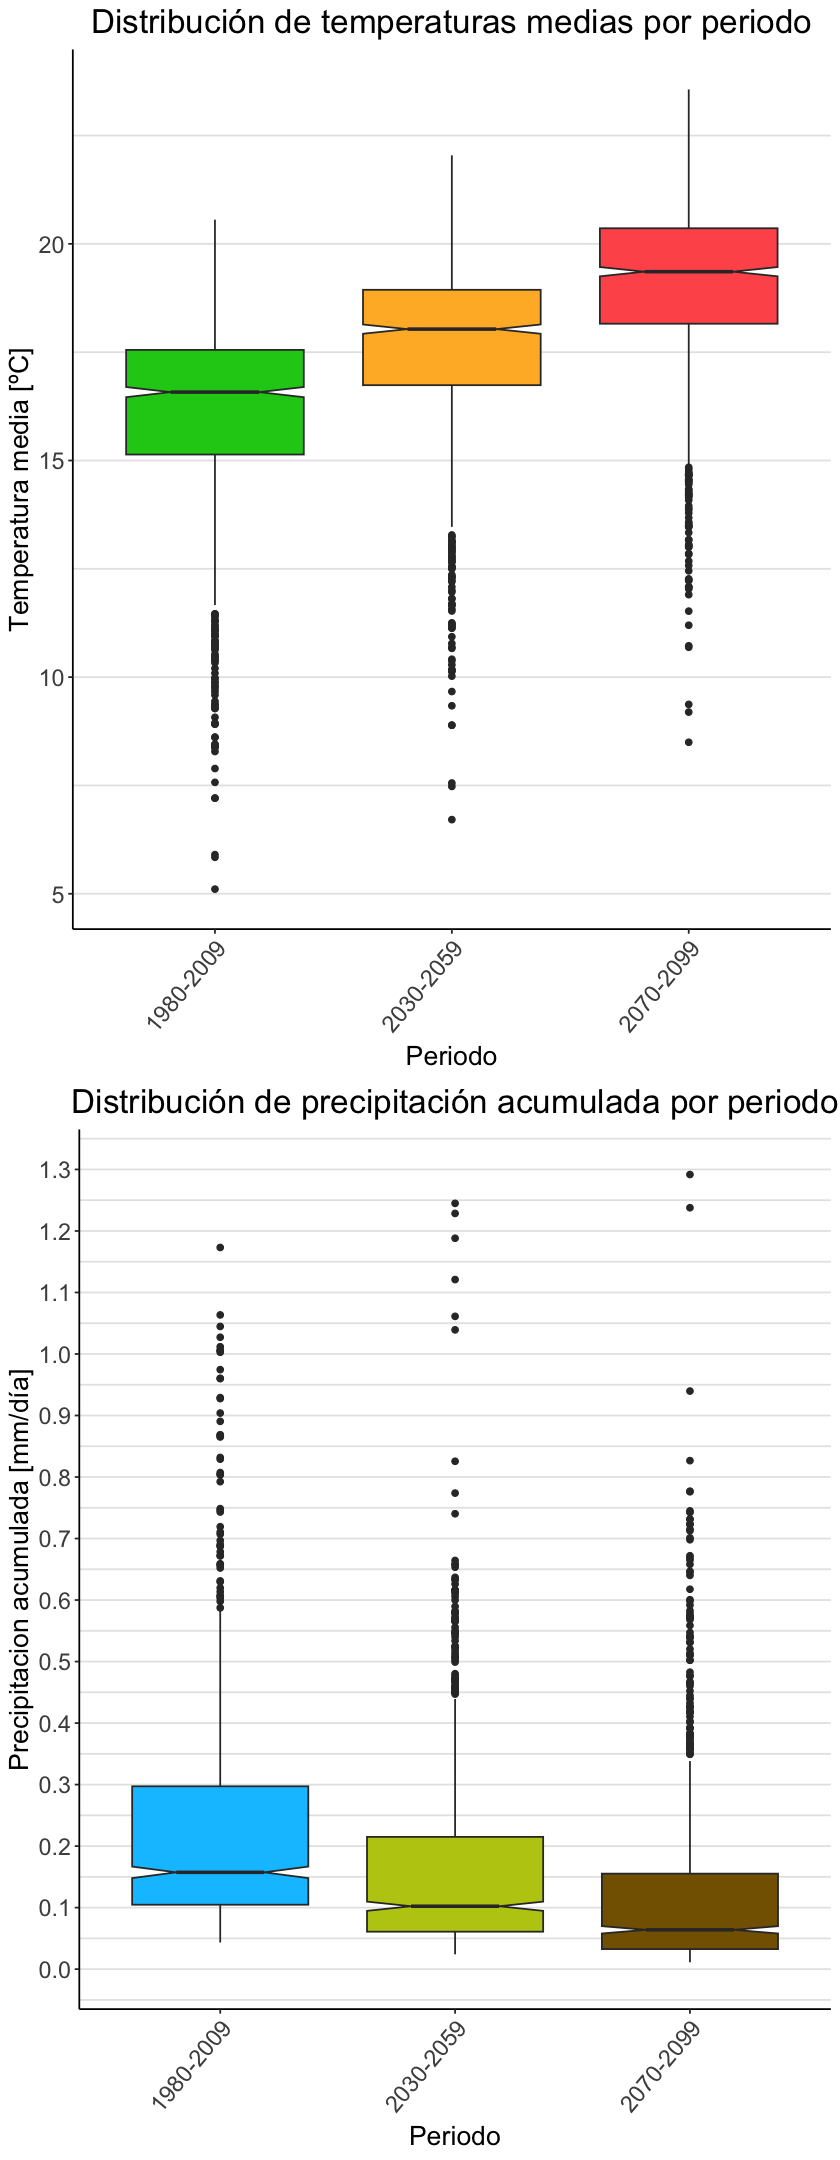

In [43]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8")
options(repr.plot.width = 7, repr.plot.height = 18)

# plot temperatura
plot_temp <- ggplot(data_temp_combined, aes(x = periodo, y = valores, fill = periodo)) +
  geom_boxplot(notch = TRUE) +
  scale_fill_manual(values = c("1980-2009" = "#17cb17", "2030-2059" = "#ffb731", "2070-2099" = "#ff5959")) +
  labs(title = "Distribución de temperaturas medias por periodo", x = "Periodo", y = "Temperatura media [ºC]") +
  theme(
    plot.title = element_text(hjust = 0.5, size = 20),
    axis.text.x = element_text(angle = 50, hjust = 1, size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "none"
  )

# plot precipitaciones
plot_precip <- ggplot(data_precip_combined, aes(x = periodo, y = valores, fill = periodo)) +
  geom_boxplot(notch = TRUE) +
  scale_fill_manual(values = c("1980-2009" = "#00c3ff", "2030-2059" = "#bbca12", "2070-2099" = "#846000")) +
  labs(title = "Distribución de precipitación acumulada por periodo", x = "Periodo", y = "Precipitacion acumulada [mm/día]") +
  scale_y_continuous(limits = c(0, 1.3), breaks = seq(0, 1.3, by = 0.1)) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 20),
    axis.text.x = element_text(angle = 50, hjust = 1, size = 14),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    panel.background = element_rect(fill = "white"),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.minor.y = element_line(color = "grey90", linewidth = 0.5, linetype = "solid"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.line = element_line(color = "black"),
    legend.position = "none"
  )

# cuadrícula
figura <- grid.arrange(plot_temp, plot_precip, ncol = 1)
ggsave("fotos/plot_esp.pdf", plot = figura, device = "pdf", width = 7, height = 18)

Se puede apreciar un aumento de las temperaturas y un descenso de la precipitacion acumulada diaria en el territorio. Otra forma de ver esto sería pintar los propios datos sobre un mapa de las Islas Canarias. Esto permite hacer explícitos los cambios en estas variables en cada zona, cosa que no permite el gráfico de cajas.

[1] "es_ES.UTF-8/es_ES.UTF-8/es_ES.UTF-8/C/es_ES.UTF-8/C"

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


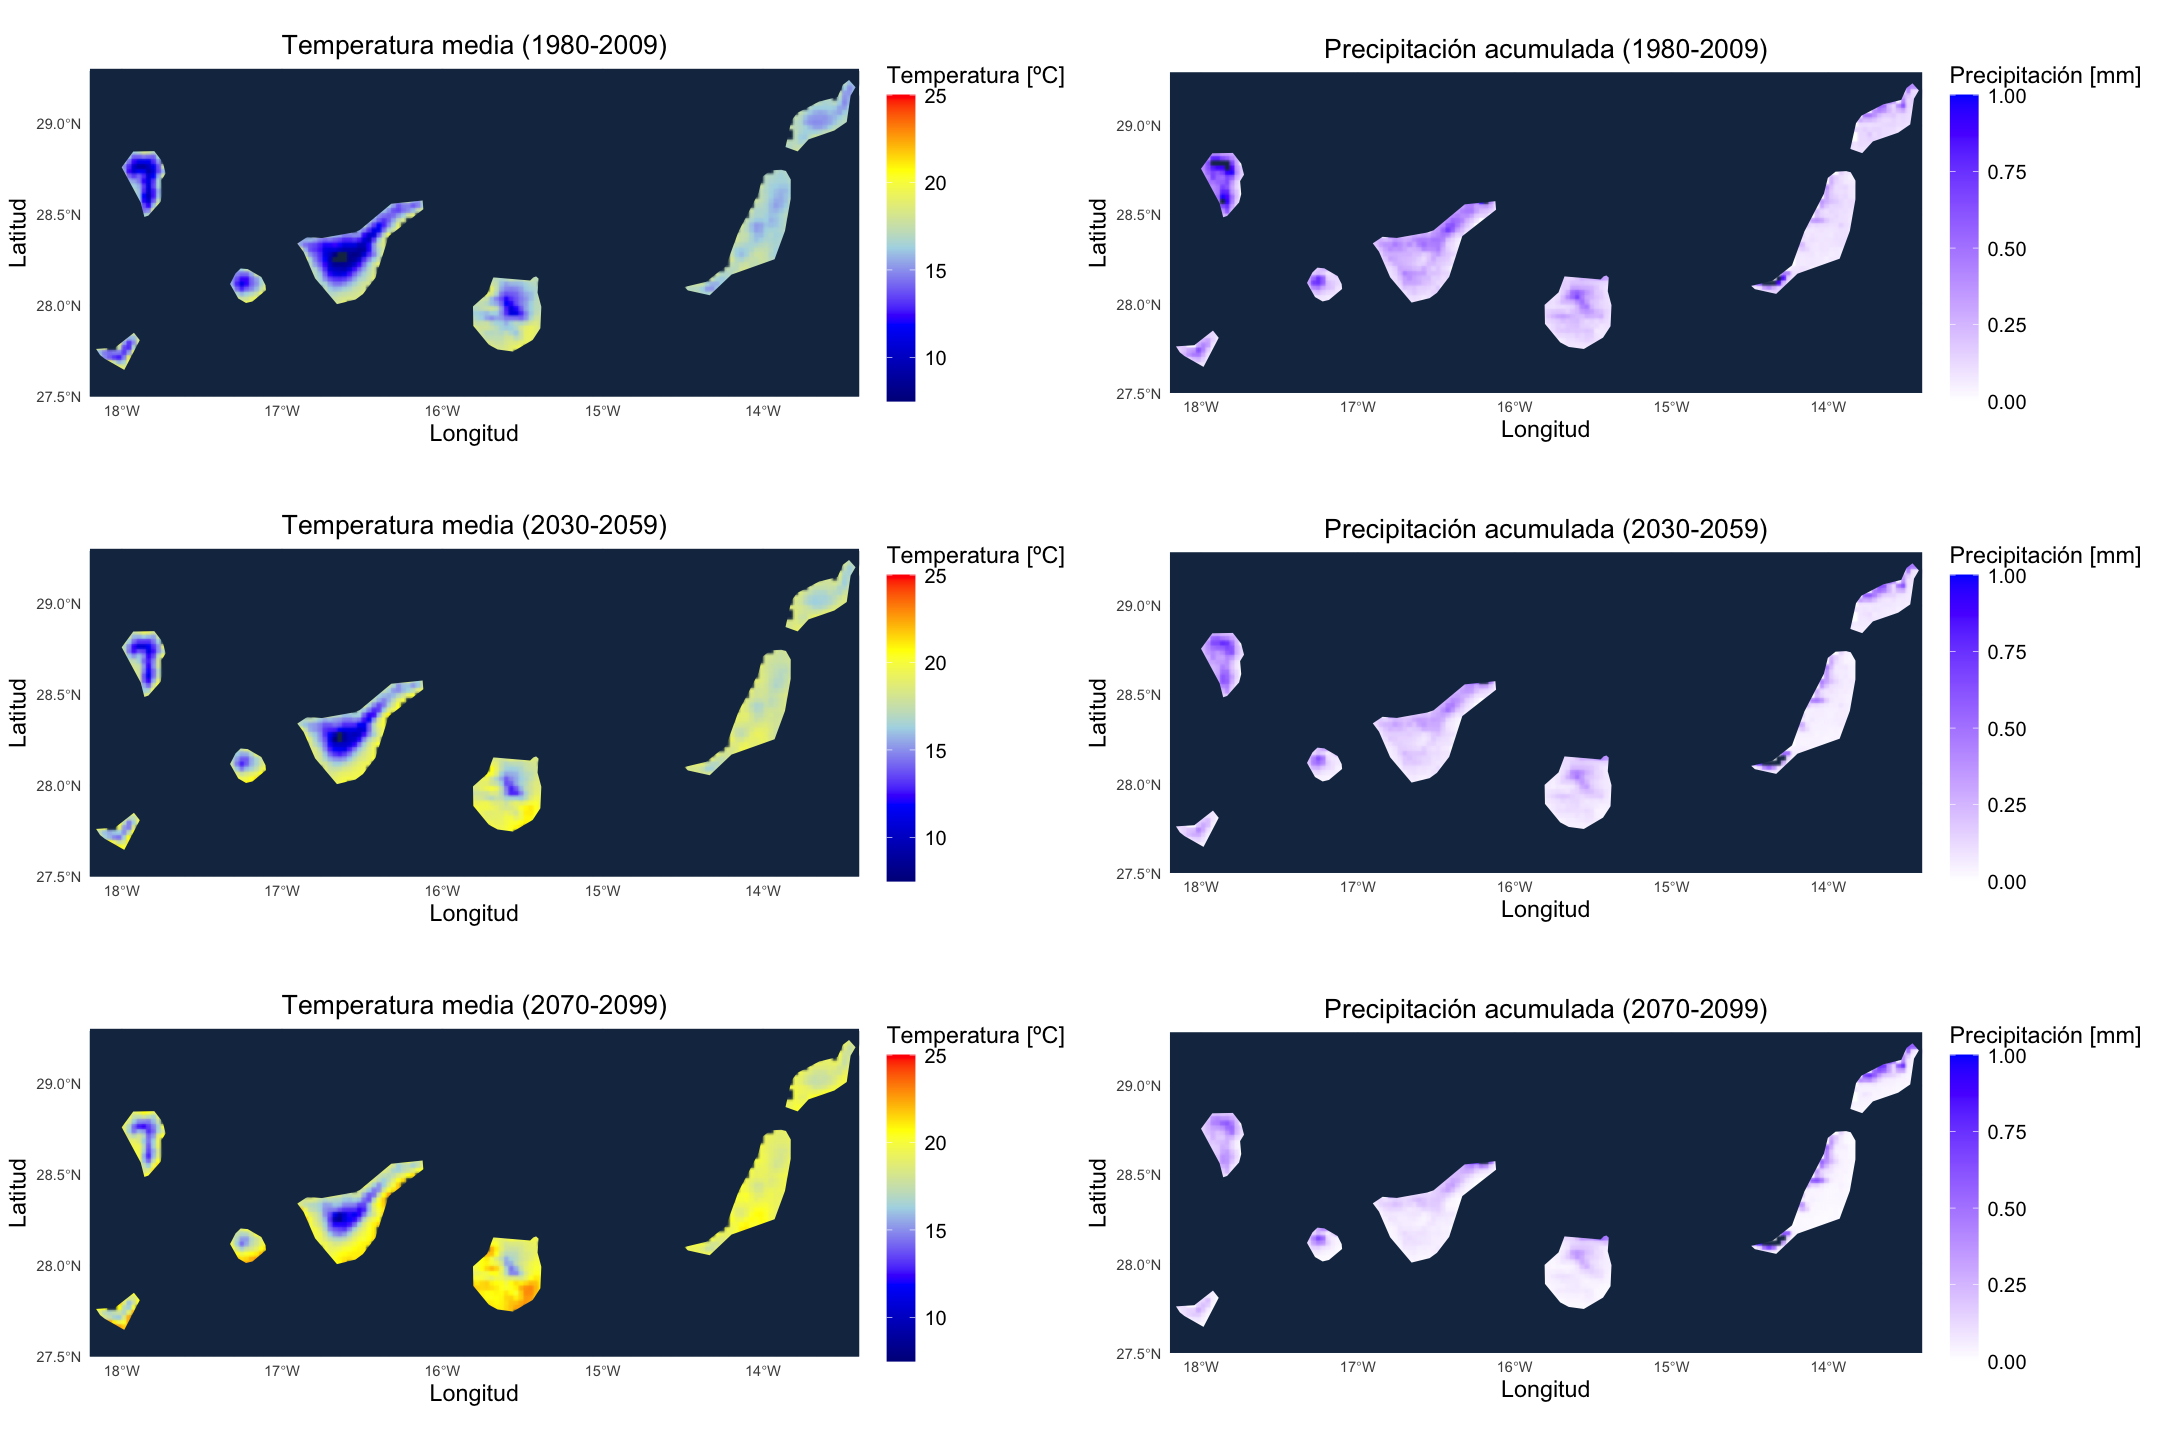

In [44]:
Sys.setlocale("LC_ALL", "es_ES.UTF-8")
options(repr.plot.width = 18, repr.plot.height = 12)

# plotear un mapa
crear_plot <- function(map, title, tipo = "temperatura") {
    mean <- apply(map, c(2, 3), mean, na.rm = TRUE) 
    df <- melt(mean) # convertir a dataframe
    colnames(df) <- c("lat_index", "lon_index", "value")
    
    # ajustar latitud y longitud
    latitudes <- seq(27.5, 29.3, length.out = 68)
    longitudes <- seq(-18.2, -13.4, length.out = 158)
    df$lat <- latitudes[df$lat_index]
    df$lon <- longitudes[df$lon_index]
    
    raster <- rasterFromXYZ(df[, c("lon", "lat", "value")]) # dataframe --> raster
    ext <- extent(-18.2, -13.4, 27.5, 29.3) # extension del mapa
    raster <- crop(raster, ext) # recortar el raster
    raster_df <- as.data.frame(raster, xy = TRUE) # raster --> dataframe para ggplot
    colnames(raster_df) <- c("lon", "lat", "value")
    
    # mapa de Canarias
    world <- ne_countries(scale = "medium", returnclass = "sf")
    canarias <- st_crop(world, xmin = -18.2, xmax = -13.4, ymin = 27.5, ymax = 29.3)
    
    # mascara de agua
    area_total <- st_as_sf(st_sfc(st_polygon(list(rbind(
      c(-18.2, 27.5),
      c(-18.2, 29.3),
      c(-13.4, 29.3),
      c(-13.4, 27.5),
      c(-18.2, 27.5)
    ))), crs = st_crs(canarias)))

    area_mar <- st_difference(area_total, st_union(canarias))
    
    # barra de color para cada mapa
    if (tipo == "temperatura") {
      fill_gradient <- scale_fill_gradientn(
        colours = c("darkblue", "blue", "lightblue", "yellow", "red"), 
        na.value = "#17324f", 
        limits = c(7.5, 25), 
        guide = guide_colorbar(
          barheight = unit(6.5, "cm"), 
          draw.ulim = TRUE, 
          draw.llim = TRUE
        )
      )
      fill_label <- "Temperatura [ºC]"
    } else if (tipo == "precipitacion") {
      fill_gradient <- scale_fill_gradientn(
        colours = c("white", "blue"), 
        na.value = "#17324f", 
        limits = c(0, 1), 
        guide = guide_colorbar(
          barheight = unit(6.5, "cm"), 
          draw.ulim = TRUE, 
          draw.llim = FALSE
        )
      )
      fill_label <- "Precipitación [mm]"
    }
  
  
  ggplot() +
      geom_sf(data = canarias, fill = NA, color = "black", size = 0.5) + 
      geom_raster(data = raster_df, aes(x = lon, y = lat, fill = value), interpolate = TRUE) +
      fill_gradient +
      geom_sf(data = area_mar, fill = "#17324f", color = NA) +
      labs(title = title, x = "Longitud", y = "Latitud", fill = fill_label) +
      theme_minimal() +
      theme(
        plot.title = element_text(hjust = 0.5, size = 16), 
        axis.title.x = element_text(size = 14), 
        axis.title.y = element_text(size = 14), 
        legend.position = "right",
        legend.text = element_text(size = 12), 
        legend.title = element_text(size = 14) 
      ) +
      coord_sf(xlim = c(-18.2, -13.4), ylim = c(27.5, 29.3), expand = FALSE)
}

# temperatura
plot1_temp <- crear_plot(tempGFDL1_map, "Temperatura media (1980-2009)", tipo = "temperatura")
plot2_temp <- crear_plot(tempGFDL2_map, "Temperatura media (2030-2059)", tipo = "temperatura")
plot3_temp <- crear_plot(tempGFDL3_map, "Temperatura media (2070-2099)", tipo = "temperatura")

# precipitacion
plot1_precip <- crear_plot(precipIPSL1_map, "Precipitación acumulada (1980-2009)", tipo = "precipitacion")
plot2_precip <- crear_plot(precipIPSL2_map, "Precipitación acumulada (2030-2059)", tipo = "precipitacion")
plot3_precip <- crear_plot(precipIPSL3_map, "Precipitación acumulada (2070-2099)", tipo = "precipitacion")

# cuadricula
figura2 <- grid.arrange(plot1_temp, plot1_precip, plot2_temp, plot2_precip, plot3_temp, plot3_precip, ncol = 2)
ggsave("fotos/map_esp.pdf", plot = figura2, device = "pdf", width = 18, height = 12)

Se verifica lo ya conocido por el gráfico de cajas, pero ahora se pueden ver los cambios de estas variables en las distintas zonas de las islas.

# Inferencia

Los resultados buscados se pueden apreciar gráficamente en la figura anterior, pero se busca una confirmación analítica. Para ello, se compararán los intervalos de confianza del periodo pasado y del futuro más lejano. De forma alternativa, un contraste de hipótesis, siendo la hipótesis nula que la media de las variables se mantiene igual en el periodo pasado y futuro lejano, puede mostrar también el cambio de tendencia mostrado si se consigue rechazar la hipótesis nula. En este apartado se trabajará solo con los datos ya promediados temporalmente, ya que interesan valores representativos de todo el territorio. 

## Intervalos de confianza

Se evaluarán los intervalos de confianza al 95% respecto de la media, tanto para temperatura media como para precipitación acumulada. En el apartado anterior se representó el intervalo de confianza a 95% respecto a la mediana, y este último tiene valores similares a la media (por lo visto en la exploración numérica de los datos), es de esperar resultados similares a los expuestos visualmente. En caso no existir solapamiento entre los intervalos de ambos periodos, quedaría demostrado una diferencia significativa en apenas 100 años. 

In [45]:
ics <- function(arr1, arr2){
    ic1 <- t.test(arr1)$conf.int # por defecto 95%
    ic2 <- t.test(arr2)$conf.int # por defecto 95%

    print(sprintf("Intervalo de confianza al 95%% en el periodo 1980-2009: [%.2f, %.2f]", ic1[1], ic1[2]))
    print(sprintf("Intervalo de confianza al 95%% en el periodo 2030-2059: [%.2f, %.2f]", ic2[1], ic2[2]))

    superposicion <- !(ic1[2] < ic2[1] || ic2[2] < ic1[1])
    a <- ifelse(superposicion, "Sí", "No")
    print(sprintf("%s hay superposición entre los intervalos de confianza.", a))
}

### Temperatura media

In [46]:
ics(media_tempGFDL1_cols, media_tempGFDL3_cols)

[1] "Intervalo de confianza al 95% en el periodo 1980-2009: [15.88, 16.17]"
[1] "Intervalo de confianza al 95% en el periodo 2030-2059: [18.88, 19.14]"
[1] "No hay superposición entre los intervalos de confianza."


Se demuestra la diferencia significativa en temperatura media buscada en un principio.

### Precipitación acumulada

In [47]:
ics(media_precipIPSL1_cols, media_precipIPSL3_cols)

[1] "Intervalo de confianza al 95% en el periodo 1980-2009: [0.22, 0.24]"
[1] "Intervalo de confianza al 95% en el periodo 2030-2059: [0.13, 0.16]"
[1] "No hay superposición entre los intervalos de confianza."


Se demuestra la diferencia significativa en precipitación acumulada buscada en un principio. En este caso es más sutil que con la temperatura, ya que esta variable tiene actualmente un valor muy pequeño.

## Constraste de hipótesis

Puede sonar redundante hacer un constraste de hipótesis, siendo la hipótesis nula la igualdad de las medias en ambos periodos temporales, habiendo demostrado que no existe solapamiento en los intervalos de confianza de los mismos. Sin embargo, se realizará como ejercicio. Para ambas variables se fijará la significancia en un 0.05 y las hipótesis serán las siguientes:
\begin{equation}
\begin{matrix}
H_0 : \mu_1 = \mu_2 \\
H_1 : \mu_1 \neq \mu_2
\end{matrix}
\end{equation}

es decir, se quiere demostrar que la media en el periodo pasado es distinta de la del futuro más lejano.

In [48]:
t_test <- function(arr1, arr2){
    test <- t.test(arr1, arr2, conf.level = 0.95)
    if (test$p.value < 0.05) {
    print(sprintf("%e < 0.05, se rechaza la hipótesis nula, las medias de ambos periodos son distintas.", test$p.value))
    } else {
    print(sprintf("%e >= 0.05, no se rechaza la hipótesis nula, las medias de ambos periodos son iguales.", test$p.value))
    }
    print(test$p.value)
    print(test)
}

### Temperatura media

In [49]:
# Realizar un t-test para comparar las medias
t_test(media_tempGFDL1_cols, media_tempGFDL3_cols)

[1] "2.112719e-168 < 0.05, se rechaza la hipótesis nula, las medias de ambos periodos son distintas."
[1] 2.112719e-168

	Welch Two Sample t-test

data:  arr1 and arr2
t = -30.392, df = 2095.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.180239 -2.794701
sample estimates:
mean of x mean of y 
 16.02243  19.00990 



Se rechaza la hipótesis nula en el caso de la temperatura media.

### Precipitacion acumulada

In [50]:
t_test(media_precipIPSL1_cols, media_precipIPSL3_cols)

[1] "2.500812e-20 < 0.05, se rechaza la hipótesis nula, las medias de ambos periodos son distintas."
[1] 2.500812e-20

	Welch Two Sample t-test

data:  arr1 and arr2
t = 9.3364, df = 2055, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.07166327 0.10977457
sample estimates:
mean of x mean of y 
0.2321501 0.1414312 



También se rechaza la hipótesis nula en el caso de la precipitación acumulada.

# Conclusiones

Se quería probar el aumento significativo de la temperatura media y el descenso de la precipitación acumulada en las Islas Canarias haciendo uso de predicciones de modelos neuronales. Este proceso es complicado con una visualización numérica, pero una representación visual adecuada de los datos lo facilita en gran medida, permitiendo incluso confirmar ambos objetivos. 

Estos se comprobaron también usando técnicas de inferencia, lo cual da un resultado analítico: a partir del no solapamiento de los intervalos de confianza se concluyó una diferencia significativa, y con un contraste se demostró analíticamente la no igualdad de las medias de ambas variables bajo estudio. 